### Start off by importing the packages that we want.

In [29]:
import numpy as np              # For numerical operations
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For plotting and visualization
import seaborn as sns           # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.linear_model import LinearRegression    # For linear regression models
from sklearn.metrics import mean_squared_error, r2_score      # For calculating errors
import random
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LinearRegression


### Read the CSV into memory

In [2]:
df = pd.read_csv("salary_dataset.csv")

### Quick check of how the data looks, columns etc

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


### Quick statistical check for the data

In [4]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


### Scatterplot to see the relationship between our 
### - Independent variable, features, x axis, X (2d Matrix)
### - Dependent variable, target, y axis, y (single column - vector)

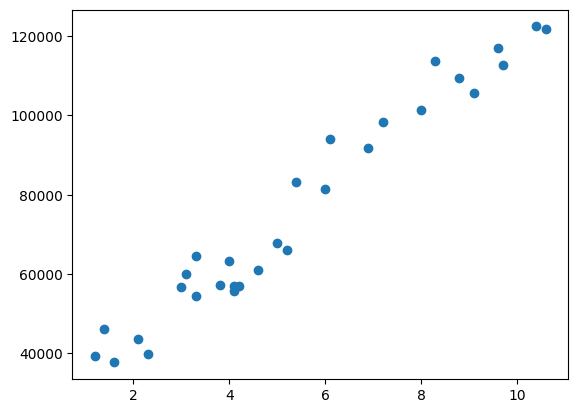

In [5]:
plt.scatter(df["YearsExperience"],df["Salary"])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

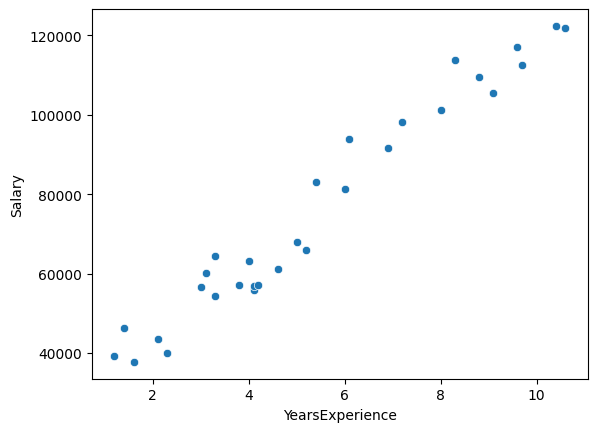

In [6]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df)

### Check to see null values by column

In [7]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

### Dropping the column(s) that we don't need.

In [10]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [11]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### Runnning a pairplot so that we can see the relationship between pairs of variables - this helps us when choosing our features (independent/X)

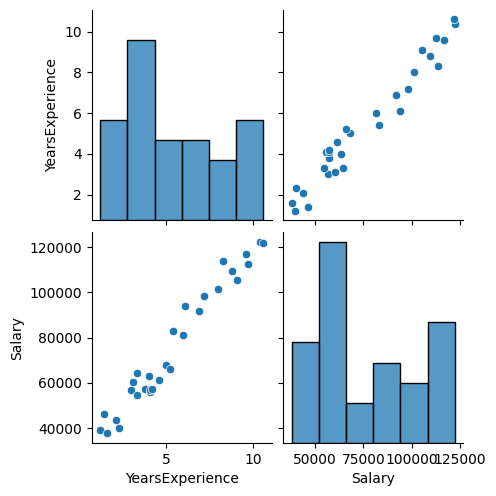

In [12]:
sns.pairplot(df)

### Correlation matrix

<Axes: >

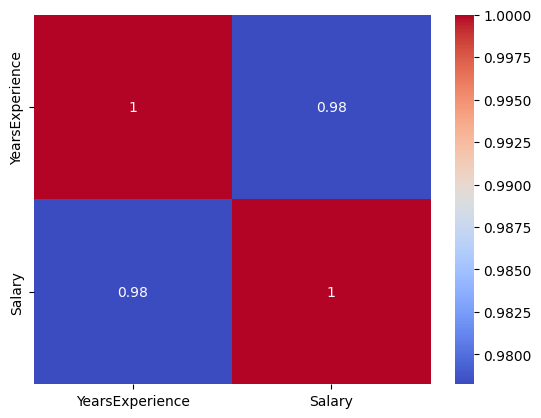

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Splitting the data into our training and our testing sets

In [14]:
X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the model

In [15]:
linregmodel = LinearRegression()
linregmodel.fit(X_train, y_train)

LinearRegression()

### Predicting our targets based on our feature

In [16]:
y_pred = linregmodel.predict(X_test)    # Predict on the test set


# Regression Evaluation Metrics

## Mean Absolute Error (MAE) - The easiest to reason about but a bit blunt
- As an error function, the closer to 0 the better.
- This is the simplest metric for evaluating regression models since it consists of calculating the average of all absolute distances between actual values and predicted values.
- The average absolute difference between a model's predicted values and the actual target values, essentially measuring how far off, on average, the predictions are from the true values, without considering the direction of the errors (i.e., whether the model overestimated or underestimated).
- It's a commonly used metric to assess the accuracy of a regression model, particularly when robustness to outliers is desired.
- A "good" MAE value depends on the scale of your target variable. For example, a MAE of $10,000 might be considered good for predicting house prices, but not for predicting temperatures in degrees Celsius.
- Robust to outliers: Unlike Mean Squared Error (MSE), MAE is less sensitive to extreme outliers, as it simply takes the absolute value of the error.
- Unlike Mean Squared Error (MSE), MAE is less sensitive to outliers because it simply takes the absolute difference, not squaring the errors, which makes it a more robust metric in certain situation.

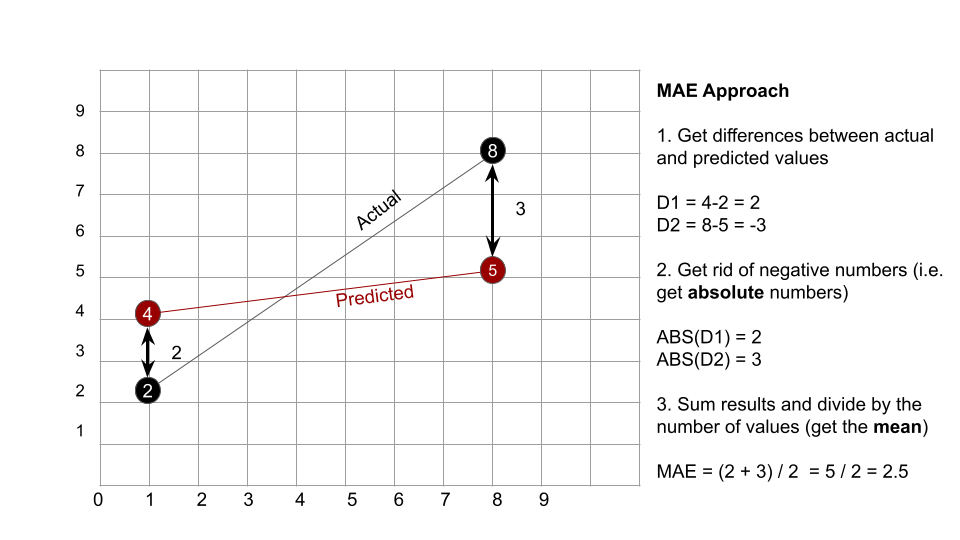

In [44]:
print(f"{'':<15}{'MAE':<20}{'MSE':<20}{'RMSE':<20}{'MedAE':<20}{'R2':<20}")
print(f"{'Baseline:':<15}{mean_absolute_error(y_test, y_pred):<20.3f}{mean_squared_error(y_test, y_pred):<20.3f}{mean_squared_error(y_test, y_pred)**0.5:<20.3f}{median_absolute_error(y_test, y_pred):<20.3f}{r2_score(y_test, y_pred):<20.3f}")


               MAE                 MSE                 RMSE                MedAE               R2                  
Baseline:      6286.454            49830096.856        7059.044            5690.237            0.902               


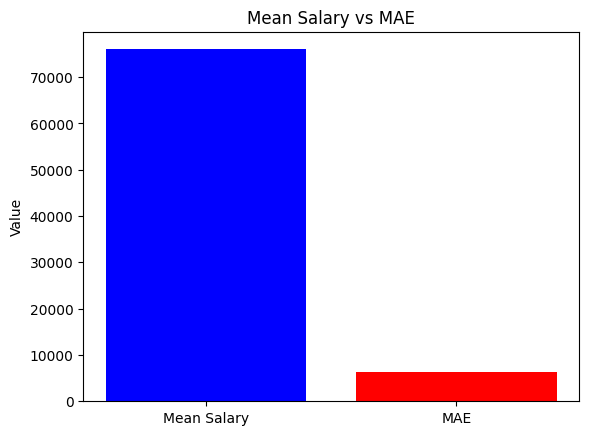

In [36]:
import matplotlib.pyplot as plt

mae = mean_absolute_error(y_test, y_pred)
mean_salary = df['Salary'].mean()

plt.bar(['Mean Salary', 'MAE'], [mean_salary, mae], color=['blue', 'red'])
plt.title('Mean Salary vs MAE')
plt.ylabel('Value')
plt.show()


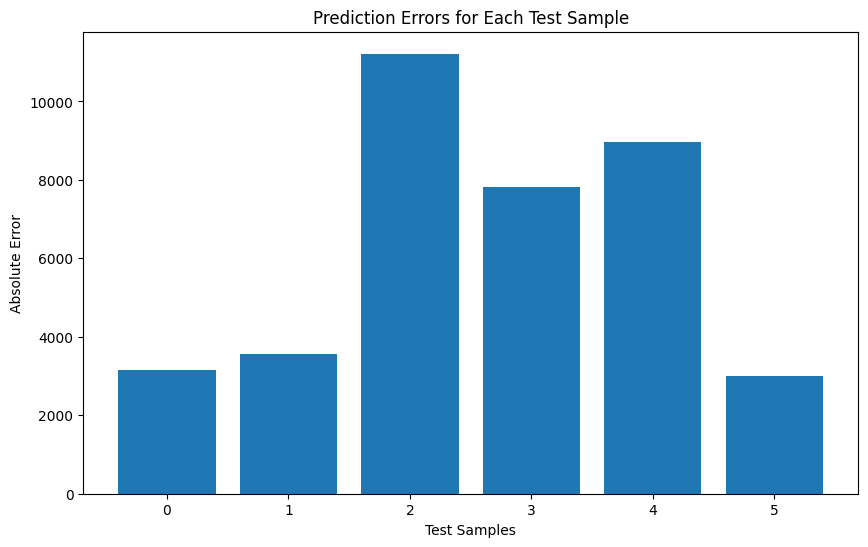

In [37]:
errors = abs(y_test - y_pred)
plt.figure(figsize=(10, 6))
plt.bar(range(len(errors)), errors)
plt.xlabel('Test Samples')
plt.ylabel('Absolute Error')
plt.title('Prediction Errors for Each Test Sample')
plt.show()


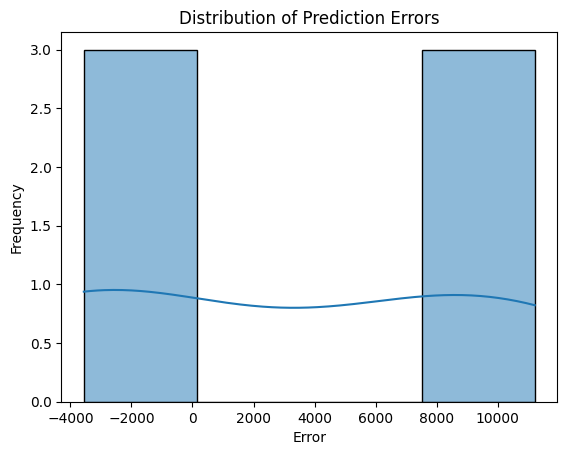

In [38]:
import seaborn as sns

errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


## Mean Squared Error(MSE) - The ‘standard’ that punishes outliers for good—and bad sometimes!
- As an error function, the closer to 0 the better.
- This metric is sort of like MAE except that the difference between the actual and predicted values is converted to a positive result by squaring the result rather than by applying abs()—sorry math folk for the pythonic explanation!
- By squaring the differences, outliers penalise the resulting score more than MAE, but only in the case of non-fractional differences.
- When we square a fractional number, we obtain a smaller number, rather than a larger one!
- In conclusion, while MSE is known to allow outliers to exert more influence, compared to MAE, this is not the case when the distances are below 1.0.

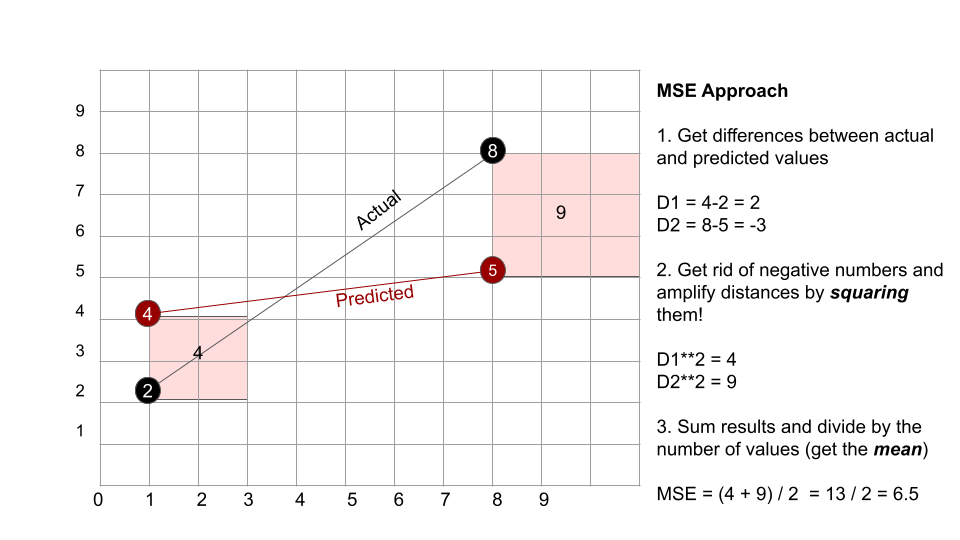

In [44]:
print(f"{'':<15}{'MAE':<20}{'MSE':<20}{'RMSE':<20}{'MedAE':<20}{'R2':<20}")
print(f"{'Baseline:':<15}{mean_absolute_error(y_test, y_pred):<20.3f}{mean_squared_error(y_test, y_pred):<20.3f}{mean_squared_error(y_test, y_pred)**0.5:<20.3f}{median_absolute_error(y_test, y_pred):<20.3f}{r2_score(y_test, y_pred):<20.3f}")


               MAE                 MSE                 RMSE                MedAE               R2                  
Baseline:      6286.454            49830096.856        7059.044            5690.237            0.902               


## Root Mean Squared Error (RMSE) - Just like MSE but without ‘upscaling’ the values.
- This is exactly like MSE except that the squared root is applied to the result first, so that the error is in a range commensurate to the data set’s scale.

In [44]:
print(f"{'':<15}{'MAE':<20}{'MSE':<20}{'RMSE':<20}{'MedAE':<20}{'R2':<20}")
print(f"{'Baseline:':<15}{mean_absolute_error(y_test, y_pred):<20.3f}{mean_squared_error(y_test, y_pred):<20.3f}{mean_squared_error(y_test, y_pred)**0.5:<20.3f}{median_absolute_error(y_test, y_pred):<20.3f}{r2_score(y_test, y_pred):<20.3f}")


               MAE                 MSE                 RMSE                MedAE               R2                  
Baseline:      6286.454            49830096.856        7059.044            5690.237            0.902               


## Median Absolute Error (MedAE) - A better MAE for cases when Bill Gates gets on the bus …
- As an error function, the closer to 0 the better.
- MedAE may be seen as another variation of MAE but the variation is not in how the differences between actuals and predictions are made positive, but in simply summarising the results using median(), rather than mean()—my apologies again math people.
- This approach minimises the influence of outliers that may sit at the extremes, but it may cause problems if we do want those outliers to be accounted in the score…

In [44]:
print(f"{'':<15}{'MAE':<20}{'MSE':<20}{'RMSE':<20}{'MedAE':<20}{'R2':<20}")
print(f"{'Baseline:':<15}{mean_absolute_error(y_test, y_pred):<20.3f}{mean_squared_error(y_test, y_pred):<20.3f}{mean_squared_error(y_test, y_pred)**0.5:<20.3f}{median_absolute_error(y_test, y_pred):<20.3f}{r2_score(y_test, y_pred):<20.3f}")


               MAE                 MSE                 RMSE                MedAE               R2                  
Baseline:      6286.454            49830096.856        7059.044            5690.237            0.902               


## R2 Score - The go-to metric for all use cases unless there’s a good reason not to.
- This is the ‘de facto’ metric for evaluating regression models, and the one used by model.score(), where model may be Linear, SVC, etc. It can also be used directly as r2_score(y_actual,y_pred). Unlike the error-wise metrics, the score is better the closer it gets to 1.
- Given that R2 is the only metric that provides a consistent score range with an upper limit of 1.0, similarly to most classification metrics, it is not wonder that it is the most popular one, and the one implemented by most models when invoking the model.score() method.

In [44]:
print(f"{'':<15}{'MAE':<20}{'MSE':<20}{'RMSE':<20}{'MedAE':<20}{'R2':<20}")
print(f"{'Baseline:':<15}{mean_absolute_error(y_test, y_pred):<20.3f}{mean_squared_error(y_test, y_pred):<20.3f}{mean_squared_error(y_test, y_pred)**0.5:<20.3f}{median_absolute_error(y_test, y_pred):<20.3f}{r2_score(y_test, y_pred):<20.3f}")


               MAE                 MSE                 RMSE                MedAE               R2                  
Baseline:      6286.454            49830096.856        7059.044            5690.237            0.902               


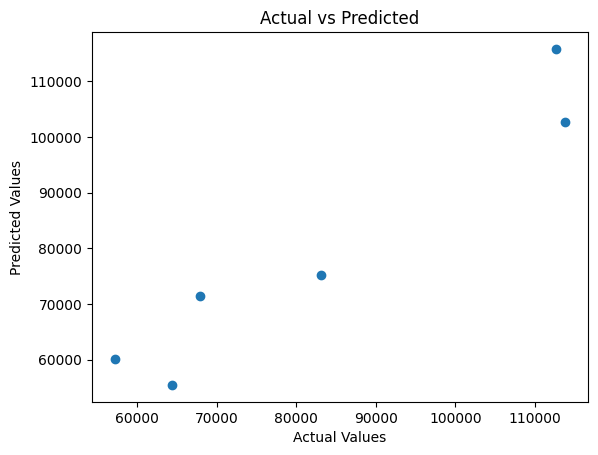

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


# Conclusion
## Trade-off #1
- Whether to allow big outliers to exert greater influence (MSE) or not (MAE)
## Trade-off #2
- Whether to ignore outliers that sit at the extremes (MedAE) or not (MAE)